<a href="https://colab.research.google.com/github/charlesamoedo/Data-Science/blob/master/Uso_Di%C3%A1rias_Viagens_Estado_Amazonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Revisão: 18/06/2020**


#### **Data Science**
*by [Charles Amoêdo](https://medium.com/@charlesamoedo)*

---

# Análise dos Valores de Diárias e Passagens do Estado do Amazonas

O [Portal da Transparência do Estado do Amazonas](http://www.transparencia.am.gov.br/), divulga os dados do Poder Executivo e é uma excelente fonte para análise de dados.


**A Lei n.12.527 (Lei de Acesso à Informação) garante acesso aos dados.**

**Neste note book**, faremos análise dos valores de diárias e passagens e mostrar os limites de gastos por Ógão do Governo do Estado do Amazonas, para 2020 e ainda, as quantidades e valores utilizados até o momento.

Esta análise será dividida em duas partes:
* 1ª relacionada à tabela de valores das diárias por categoria
* 2ª Relacionada ao uso das diárias


## Obtenção dos Dados
Os dados utilizados aqui foram obtidos a partir do [Portal da Transparência do Estado do Amazonas](http://www.transparencia.am.gov.br/) e o processamento foi o seguinte:
#### Dados por Categoria e Ógãos do Governo:
Objetivo: Exibir Tabela de valores das diárias por categoria.

* a) [Tabela de valores de Diárias](http://www.transparencia.am.gov.br/wp-content/uploads/2020/02/Tabela-de-Valores-de-Di%C3%A1rias-dentro-do-Estado-fora-do-Estado-e-fora-do-Pa%C3%ADs.pdf) (PDF)
* b) A conversão do arquivo PDF para .csv foi feita através do site [FreeConverter](https://www.freepdfconvert.com/).
* c) Gerado então o arquivo **ValorDiarias_Am.csv**
* d) Utilizando o excel, Foi criada uma coluna categoria para cada registro da tabela e justados os cabeçaçhos das colunas.

## 1º - Valores das diárias por categoria:


### Análise dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# importar o arquivo listings.csv para um DataFrame
# df = pd.read_csv("/content/sample_data/ValorDiarias_Am.csv")
df =pd.read_csv("https://raw.githubusercontent.com/charlesamoedo/Data-Science/master/datasets/ValorDiarias_Am.csv")

**Dicionário das variáveis**

* CATEGORIA - Categoria de cargo ou função              
* CARGOS_FUNÇOES -  Cargo ou função
* NO_ESTADO_R - Valor em Reais da diária no estado
* FORA_DO_ESTADO_R - Valor em Reais da diária fora do estado
* CONTINENTE_AMERICANO_US - Valor em Dólar da diária no continente Americano
* OUTROS_PAISES_US - - Valor em Dólar da em outros países

Dados do *dataset*, analisando as 5 primeiras entradas.

In [10]:
# mostrar as 5 primeiras entradas
df.head()

,CATEGORIA,CARGOS_FUNÇOES,NO_ESTADO_R,FORA_DO_ESTADO_R,CONTINENTE_AMERICANO_US,OUTROS_PAISES_US
0,CAT1,Secretário de Estado,252.0,395.0,360.0,500.0
1,CAT1,Secretário do Gabinete Pessoal do Governador,252.0,395.0,360.0,500.0
2,CAT1,Controlador Geral do Estado,252.0,395.0,360.0,500.0
3,CAT1,Procurador Geral do Estado,252.0,395.0,360.0,500.0
4,CAT1,Ouvidor Geral do Estado,252.0,395.0,360.0,500.0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
print('\n')

# verificar os tipos de variáveis do dataset
display(df.dtypes);


Entradas:	 56
Variáveis:	 6




CATEGORIA                   object
CARGOS_FUNÇOES              object
NO_ESTADO_R                float64
FORA_DO_ESTADO_R           float64
CONTINENTE_AMERICANO_US    float64
OUTROS_PAISES_US           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
* É possível notar que não há dados ausentes no **dataset**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

OUTROS_PAISES_US           0.0
CONTINENTE_AMERICANO_US    0.0
FORA_DO_ESTADO_R           0.0
NO_ESTADO_R                0.0
CARGOS_FUNÇOES             0.0
CATEGORIA                  0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

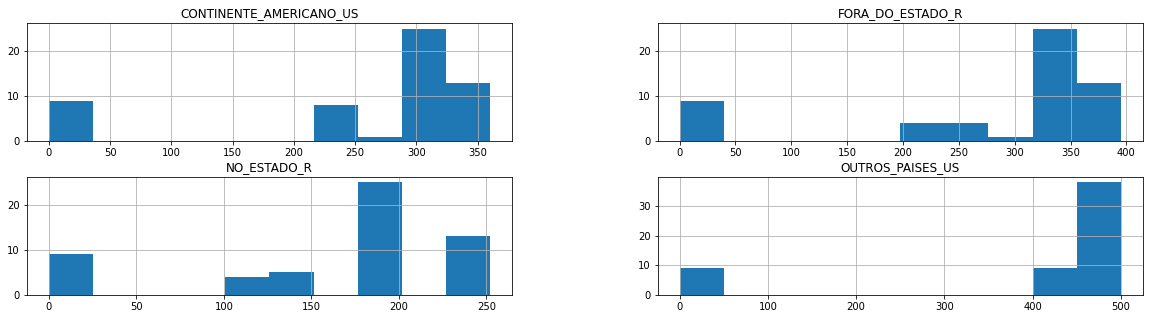

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(20,5));

### **Q4. Qual a média dos valores das diárias?**
* Abaixo o resumo estatístico dos valores das variáveis numericas.


In [ ]:
# ver a média dos valores
df[['NO_ESTADO_R','FORA_DO_ESTADO_R','CONTINENTE_AMERICANO_US','OUTROS_PAISES_US']].describe()

,NO_ESTADO_R,FORA_DO_ESTADO_R,CONTINENTE_AMERICANO_US,OUTROS_PAISES_US
count,56.000000,56.000000,56.000000,56.000000
mean,160.375000,275.892857,262.678571,392.321429
std,81.154076,131.749442,120.732478,175.374830
min,0.000000,0.000000,0.000000,0.000000
25%,132.000000,252.000000,250.000000,410.000000
50%,182.000000,327.000000,310.000000,470.000000
75%,182.000000,327.000000,310.000000,470.000000
max,252.000000,395.000000,360.000000,500.000000


Observamos:
###a) que a **média e mediana** respectivamente para cada destino são:
* NO_ESTADO_R$ **(160,37 / 182,00)**

* FORA_DO_ESTADO_R$ **(275,89 / 327,00)**

* CONTINENTE_AMERICANO_US$ **(262,67 / 310,00)**

* OUTROS_PAISES_US$ **(392,32 / 470,00)**

###b) 75% dos valores são entre 72% e 94% do seu limite máximo


### **Q4. Qual a correlação existente entre as variáveis**
* Criada matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['NO_ESTADO_R','FORA_DO_ESTADO_R','CONTINENTE_AMERICANO_US','OUTROS_PAISES_US']].corr()
display(corr)
# mostrar a matriz de correlação


,NO_ESTADO_R,FORA_DO_ESTADO_R,CONTINENTE_AMERICANO_US,OUTROS_PAISES_US
NO_ESTADO_R,1.000000,0.987750,0.972197,0.933877
FORA_DO_ESTADO_R,0.987750,1.000000,0.992424,0.971466
CONTINENTE_AMERICANO_US,0.972197,0.992424,1.000000,0.991510
OUTROS_PAISES_US,0.933877,0.971466,0.991510,1.000000


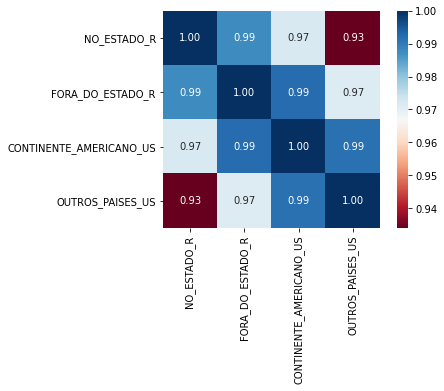

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## 2º - Valores das diárias por categoria:


## Obtenção dos Dados
Os dados utilizados aqui foram obtidos a partir do [Portal da Transparência do Estado do Amazonas](http://www.transparencia.am.gov.br/) e o processamento foi o seguinte:
#### Dados por Categoria e Ógãos do Governo:
Objetivo: Exibir de valores e quantidades das diárias utilizadas por Órgão do Estado do Amazonas.

* a) [Quantidade de Diárias](http://www.transparencia.am.gov.br/diarias-e-passagens/# (CSV)
 * Nome Original do Arquivo: Diárias e passagens - Portal da Transparência  Portal da Transparência - Portal da Transparência do Governo do Estado do Amazonas.csv
* b) Gerado então o arquivo **diarias_orgaos.csv**

### Análise dos Dados


In [8]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# importar o arquivo listings.csv para um DataFrame
df_di = pd.read_csv("https://raw.githubusercontent.com/charlesamoedo/Data-Science/master/datasets/diarias.csv")

**Dicionário das variáveis**

* Órgão - Órgão que utilizoou as diárias              
* Quantidade -  Quantidade de diárias
* Gasto Total - Valor em Reais

Dados do *dataset*, analisando as 5 primeiras entradas.

In [12]:
# mostrar as 5 primeiras entradas
df_di.head()

,Orgao,Quantidade,Gasto_Total
0,ADAF-AM,2000.0,313832.50
1,ADS,154.0,22439.50
2,AMAZONASTUR,260.5,129834.10
3,AMAZONPREV,67.5,17535.00
4,CASA CIVIL,390.0,99911.09


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_di.shape[0]))
print("Variáveis:\t {}".format(df_di.shape[1]))

# verificar os tipos de variáveis do dataset
display(df_di.dtypes);

Entradas:	 46
Variáveis:	 3


Orgao           object
Quantidade     float64
Gasto_Total    float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
* É possível notar que não há dados ausentes no **dataset**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_di.isnull().sum() / df_di.shape[0]).sort_values(ascending=False)

Gasto_Total    0.0
Quantidade     0.0
Orgao          0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

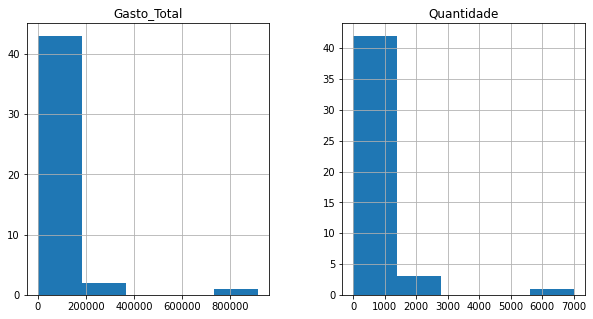

In [ ]:
# plotar o histograma das variáveis numéricas
df_di.hist(bins=5, figsize=(10,5));

### **Q4. Qual a média dos valores das diárias?**
* Abaixo o resumo estatístico dos valores das variáveis numericas.


In [ ]:
# ver a média dos valores
df_di[['Quantidade','Gasto_Total']].describe()

,Quantidade,Gasto_Total
count,46.000000,46.000000
mean,433.923913,65174.575870
std,1107.445358,146934.899014
min,0.000000,0.000000
25%,17.250000,4399.750000
50%,94.750000,25475.750000
75%,355.750000,61753.875000
max,7000.000000,917651.000000


**Observamos:**
a) Em relação ao **Gasto Total** a média e mediana respectivamente utilizadas são:

* Gasto Total **(R$)** **( 65.144,57 / 25.475,75)**

b) Em relação ao **Quantidade** a média e mediana respectivamente utilizadas são:

* Quantidade  **( 433,92 / 94,75)**


c) 75% da amostra utilizou 355,75 diárias tatalizando R$ 61.753,87


### **Q5. Qual a correlação existente entre as variáveis?**

In [ ]:
# matriz de correlação
corr = df_di[['Quantidade','Gasto_Total']]
display(corr)


,Quantidade,Gasto_Total
0,2000.0,313832.50
1,154.0,22439.50
2,260.5,129834.10
3,67.5,17535.00
4,390.0,99911.09
5,504.5,74860.00
6,496.5,71612.00
7,7000.0,917651.00
8,8.0,2888.00
9,465.5,62290.50


Abaixo mostramos o hotmap dos gastos ais relevantes em Reais(R$). 

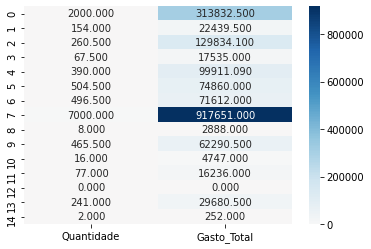

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr[:15], cmap='RdBu', fmt='.3f', linecolor='white', center=True, xticklabels='auto', annot=True);

In [ ]:
# mostrar a porcentagem Top 15 dos Orgão 
df_di[:15].Gasto_Total.value_counts() / df_di[:15].shape[0]*100


17535.00     6.666667
29680.50     6.666667
917651.00    6.666667
99911.09     6.666667
313832.50    6.666667
22439.50     6.666667
74860.00     6.666667
129834.10    6.666667
62290.50     6.666667
252.00       6.666667
0.00         6.666667
16236.00     6.666667
4747.00      6.666667
2888.00      6.666667
71612.00     6.666667
Name: Gasto_Total, dtype: float64

### **Q6. Qual a secretaria que usou mais diárias?**



In [ ]:
# Secretaria que usou mais diárias (**Quantidades)
df_di.groupby(['Orgao']).Quantidade.mean().sort_values(ascending=False)[:15]

Orgao
CETAM            7000.0
UEA              2500.0
ADAF-AM          2000.0
PMAM             1400.0
SEDUC             725.0
CASA MILITAR      504.5
CBMAM             496.5
IPAAM             482.5
DETRAN            465.5
SSP               407.5
CASA CIVIL        390.0
POLICIA CIVIL     364.5
IDAM              329.5
SUSAM             301.5
FVS-AM            274.5
Name: Quantidade, dtype: float64

In [ ]:
# Secretaria que usou mais diárias (**Valores Gastos)
df_di.groupby(['Orgao']).Gasto_Total.mean().sort_values(ascending=False)[:15]

Orgao
CETAM            917651.00
UEA              338267.50
ADAF-AM          313832.50
PMAM             178292.00
AMAZONASTUR      129834.10
CASA CIVIL        99911.09
SEDUC             96564.00
CASA MILITAR      74860.00
CBMAM             71612.00
SUSAM             66792.60
IPAAM             62768.00
DETRAN            62290.50
SSP               60144.00
POLICIA CIVIL     53408.00
SGVG              50166.70
Name: Gasto_Total, dtype: float64

Verificamos acima que o **CETAM**  utiliza  três vezes o valor de diárias em relação ao segundo Órgão que mais utizou **UEA**.  

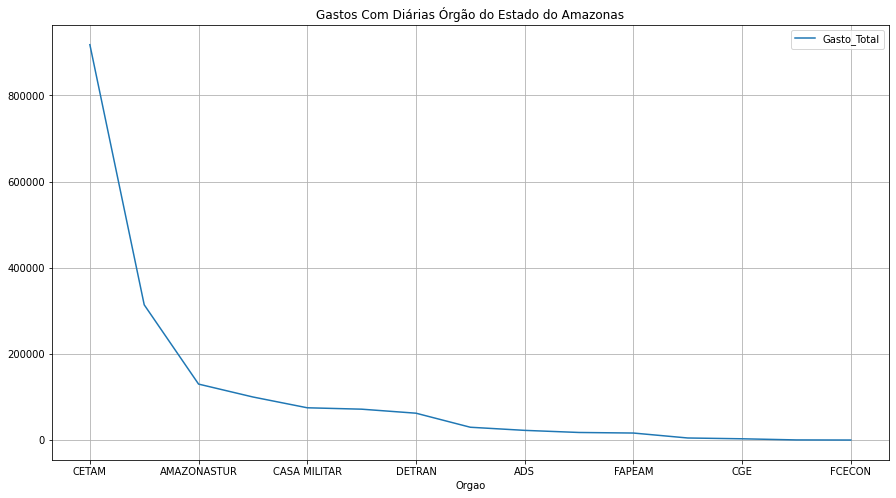

In [ ]:
# plotar os imóveis pela latitude-longitude
df_pl=df_di[:15].groupby(['Orgao']).Gasto_Total.mean().sort_values(ascending=False)[:15]
df_pl.plot(title="Gastos Com Diárias Órgão do Estado do Amazonas", legend=True,grid=True, figsize=(15,8));

## Conclusões


Realizada apenas uma análise superficial dos dados relacionados aos gastos com diárias de viagem dos ógãos publicos do Estado do Amazonas.

Avaliamos que há possibilidade de aprofundar as análises com esses dados e cruzar informações relacionadas de outros Estados da Federação e então mostra um comparativo nacional.

Concluímos ainda, que é necessário ligar os **órgãos às respectivas categorias**,  pois no arquivo de dados de uso das diárias, não há tal relação, desta forma, não foi possível detalhar os gastos por categoria.   

